# Logistic Regression

Logistic regression is a method in statistics for performing binary classification. This classification is performed by modelling thie input data through the logistic function

$$
    \frac{1}{1 + e^{-x}}
$$

Where x is the output of each feature multiplied by some weight. Finding the optimal weights is performed using maximum likelihood estimation or 

Text(0, 0.5, 'feature 2')

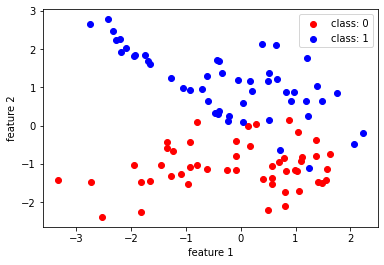

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from matplotlib.colors import ListedColormap

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_informative=2, n_features=2, n_redundant=0, n_repeated=0)
y = y.reshape(100, 1)

for cidx in np.unique(y):
    subset = X[y.flatten() == cidx]
    plt.scatter(subset[:,0], subset[:,1], label=f'class: {cidx}', color=cmap.colors[cidx])
plt.legend()
plt.xlabel('feature 1')
plt.ylabel('feature 2')

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.92      0.94      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



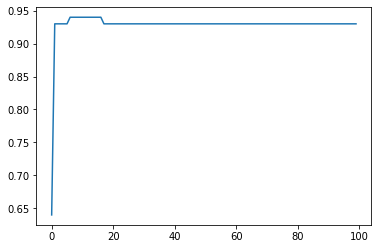

In [7]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

B = np.random.normal(0, 1, (1, X.shape[1]))
learning_rate = 0.01

accuracies = []

for i in range(100):
    y_hat = logistic_function(X @ B.T)

    gradient = (X.T @ (y_hat - y)).T
    B -= learning_rate * gradient
    
    preds = (y_hat > 0.50).astype(int).flatten()

    accuracies.append(accuracy_score(y_true=y.flatten(), y_pred=preds))

plt.figure()
plt.plot(accuracies)

print(classification_report(y_pred=preds, y_true=y.flatten()))

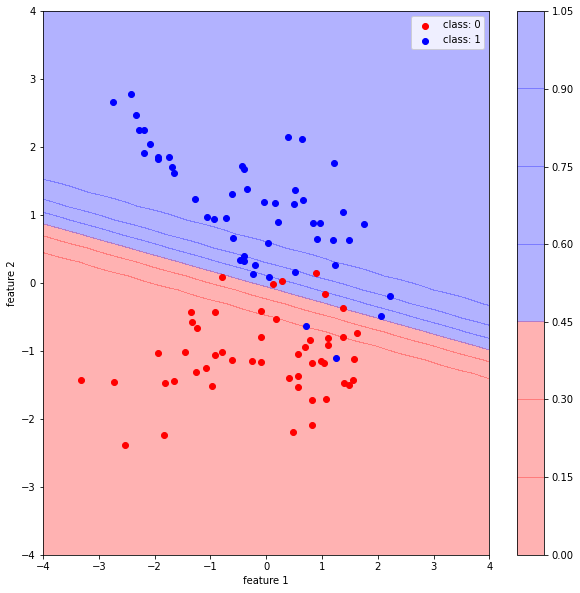

In [8]:
def f(x, y):
    return logistic_function(B[0][0] * x + B[0][1] * y)


f1,f2 = np.meshgrid(np.linspace(-4, 4, 50), np.linspace(-4, 4, 40)) # (X, Y)

z = f(f1,f2)

plt.figure(figsize=(10, 10))
plt.contourf(f1, f2, z, alpha=0.3, cmap=cmap)
plt.colorbar()

for cidx in np.unique(y):
    subset = X[y.flatten() == cidx]
    plt.scatter(subset[:,0], subset[:,1], label=f'class: {cidx}', color=cmap.colors[cidx])
plt.legend()
plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.show()

In [9]:
B

array([[0.85995304, 3.70346564]])